<strong><b><font size="5">Solução de Exercícios e Decomposição de Séries Temporais</font></b></strong>

O Jupyter Notebook desta aula está dividido em 2 partes: 

- Na Parte 1 você encontra a solução dos Exercícios da Aula 9.
- Na Parte 2 está o assunto desta Aula 10: Decomposição de Séries Temporais.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Instala o pacote yfinance
#!pip install -q yfinance

In [4]:
# Atualiza o pacote Statsmodels
#!pip install -q -U statsmodels

In [5]:
# Atualiza o pacote Pandas
#!pip install -q -U pandas

In [6]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import yfinance as yf

# Imports para análise de dados
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Parte 1 - Solução de Exercícios da Aula 9

## Exercício 1

Seu trabalho neste exercício é analisar a série temporal de produção mensal de sorvete entre 1972 e 2020 e então responder à pergunta abaixo:

1- Essa série temporal é estacionária ou não estacionária? Apresente o resultado da sua análise para justificar sua resposta.

O dataset fornecido a você é uma versão simplificada do dataset Icecream, resultado de um estudo realizado nos EUA:

https://rdrr.io/rforge/Ecdat/man/Index.Time.Series.html

In [7]:
# Carrega os dados
dados_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset2.csv')

In [8]:
# Série
dados_serie.head()

,DATE,NUMBER
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [9]:
# Ajusta o nome das colunas
dados_serie.rename(columns = {'DATE':'data', 'NUMBER':'producao'}, inplace = True)

In [10]:
# Série
dados_serie.head()

,data,producao
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [11]:
# Converte a data no formato apropriado
dados_serie['data'] = pd.to_datetime(dados_serie['data'], format = '%Y-%m')

In [12]:
# Define a data como índice da série
dados_serie = dados_serie.set_index('data')

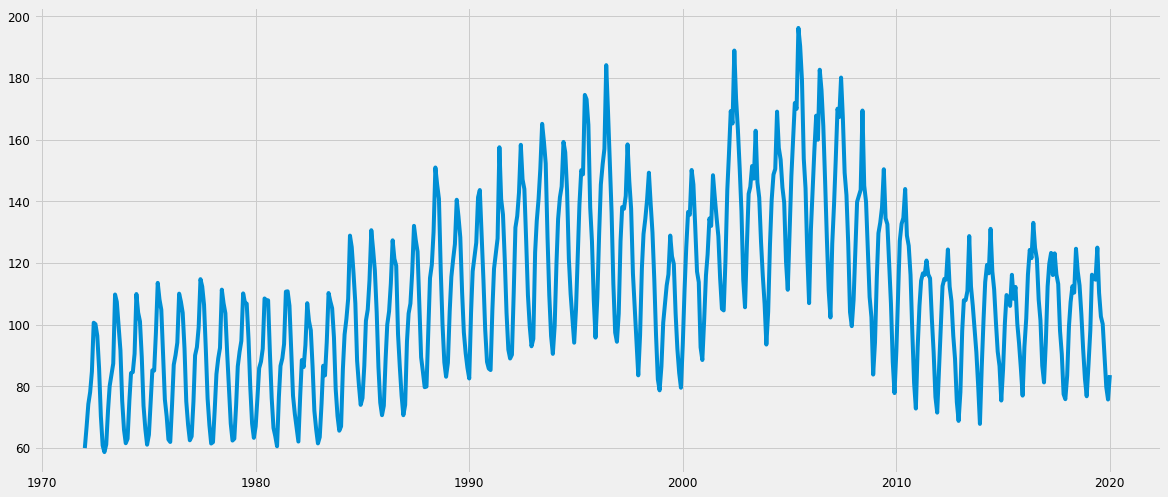

In [13]:
# Plot
plt.plot(dados_serie)

In [14]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

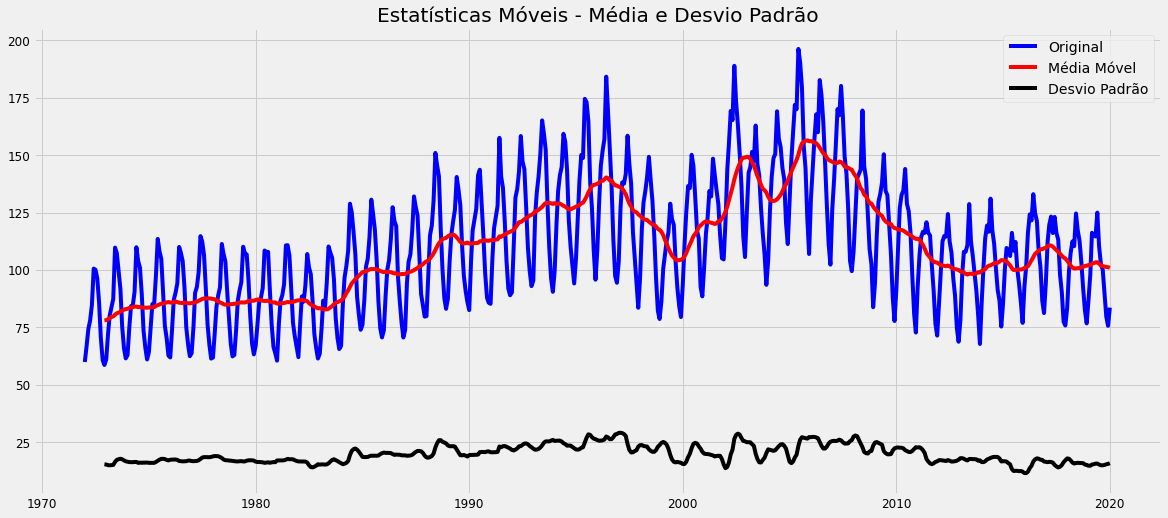


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.758009
Valor-p                           0.401499
Número de Lags Consideradas      19.000000
Número de Observações Usadas    557.000000
Valor Crítico (1%)               -3.442145
Valor Crítico (5%)               -2.866743
Valor Crítico (10%)              -2.569541
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [15]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(dados_serie['producao'])

Resposta: A série não é estacionária, pois média e variância não são constantes ao longo do tempo, o que é confirmado pelo valor-p do teste de estacionaridade. A Autocorrelação da série nos ajuda a identificar isso também.

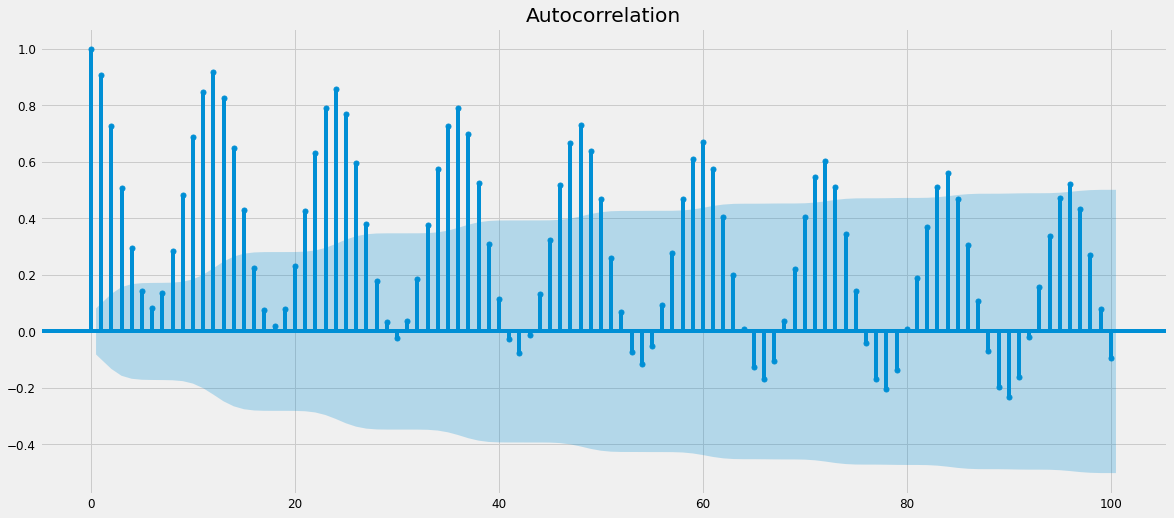

In [16]:
# Plot ACF (Auto Correlation)

# A autocorrelação é a correlação de uma série temporal com uma cópia atrasada de si mesma.

# Testando a hipótese nula de que a correlação da série com a sua defasagem é igual a zero, podemos rejeitá-la 
# sempre que o nível de correlação estiver acima ou abaixo da área azul, com um nível de significância de 5%. 

# Com base na deterioração do ACF, provavelmente estamos lidando com um processo de regressão automática. 
# Mas isso é assunto para outras aulas.

acf_plot = plot_acf(dados_serie.producao, lags = 100)

## Exercício 2

Neste exercício você usará um dataset disponível no pacote yfinance. Já podemos antecipar que a série NÃO é estacionária e seu trabalho é aplicar as transformações necessárias para converter a série em estacionária.

Aproveite a oportunidade para estudar e revisar tudo que foi mostrado até aqui no curso, antes de avançarmos para temas mais complexos nas próximas aulas.

In [17]:
# Define o código de uma das ações disponíveis cujos dados são disponibilizados pelo Yahoo Finance
tickerSymbol = 'SPY'

In [18]:
# Coleta os dados
tickerData = yf.Ticker(tickerSymbol)

In [19]:
# Obtém os valores históricos entre 2015 e 2020
tickerDf = tickerData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

In [20]:
# Gera o dataframe com os valores de fechamento das ações
tickerDf = tickerDf[['Close']]

In [21]:
# Visualiza os dados
tickerDf.head()

,Close
Date,
2015-01-02,179.784119
2015-01-05,176.537292
2015-01-06,174.874496
2015-01-07,177.053589
2015-01-08,180.195450


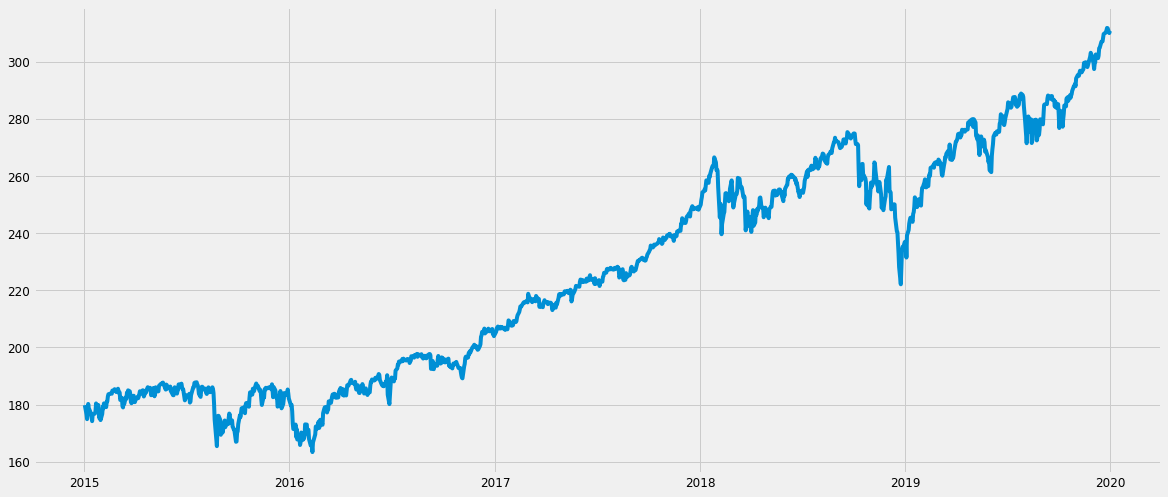

In [22]:
# Plot
plt.plot(tickerDf)

A série é claramente não estacionária.

In [23]:
# Calculando a Diferenciação
diff_primeira_ordem = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
diff_primeira_ordem = np.concatenate([diff_primeira_ordem, [0]])

In [24]:
# Incluindo a diferença de primeira ordem no dataset
diff_primeira_ordem = pd.DataFrame(diff_primeira_ordem)
diff_primeira_ordem.columns = ['Diff']

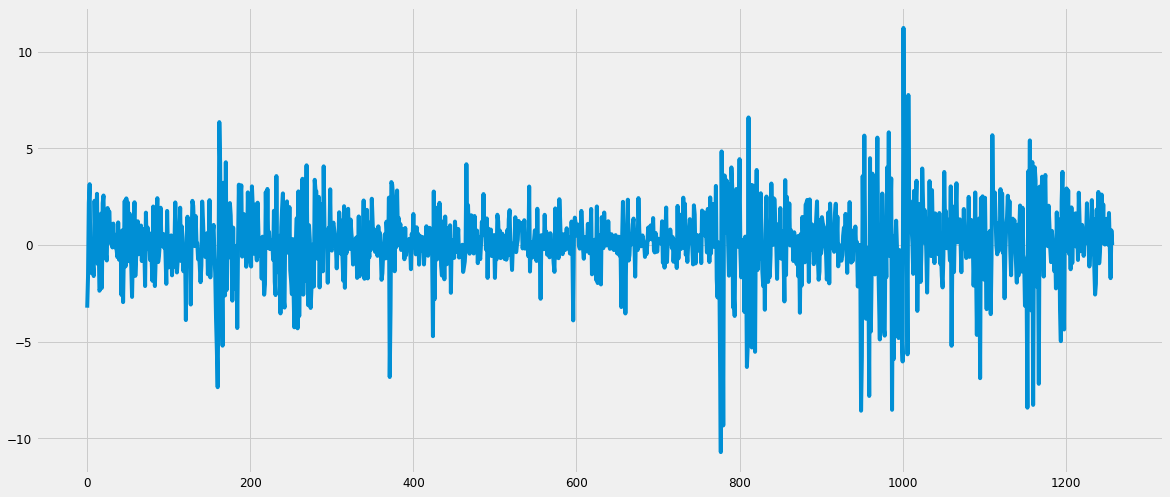

In [25]:
plt.plot(diff_primeira_ordem)

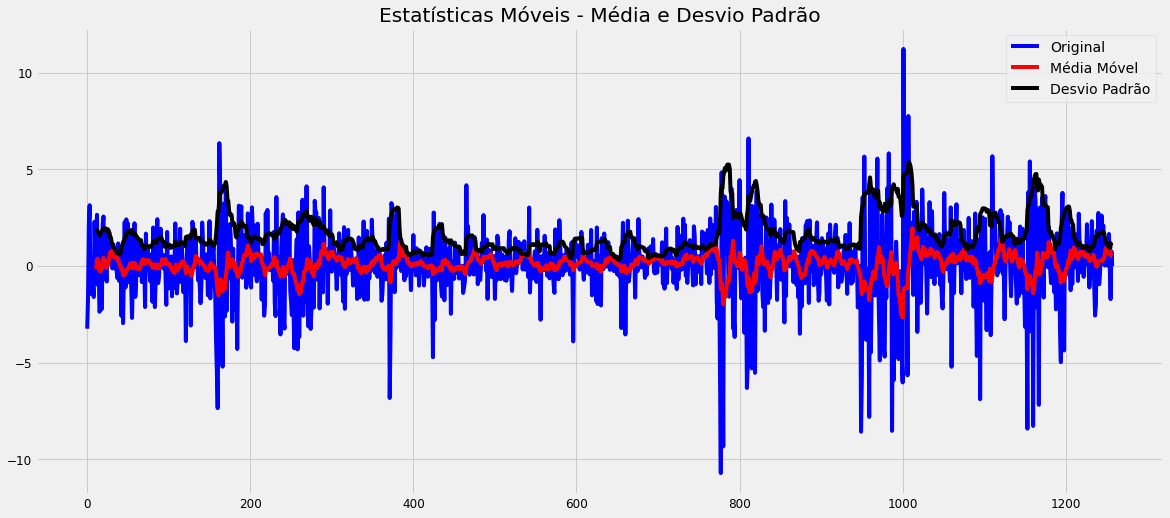


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.339060e+01
Valor-p                         4.775937e-25
Número de Lags Consideradas     7.000000e+00
Número de Observações Usadas    1.250000e+03
Valor Crítico (1%)             -3.435592e+00
Valor Crítico (5%)             -2.863855e+00
Valor Crítico (10%)            -2.568003e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [26]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(diff_primeira_ordem['Diff'])

# Parte 2 - Decomposição

Quando decompomos uma série temporal em seus componentes, geralmente combinamos a tendência e o ciclo em um único componente (às vezes chamado de tendência por simplicidade). Assim, pensamos em uma série temporal como compreendendo três componentes: um componente do ciclo de tendência, um componente sazonal e um componente restante (contendo qualquer outra coisa na série temporal).

A decomposição de uma série temporal permite calcular cada um dos componentes de forma individual.

Depois de termos o componente de tendência, podemos usá-lo para remover as variações de tendência dos dados originais. Em outras palavras, podemos fazer um "DeTrend" da série cronológica subtraindo o componente Trend da mesma.

Idealmente, tendência e sazonalidade devem capturar a maioria dos padrões da série temporal. Portanto, os resíduos representam o que resta da série temporal, depois que a tendência e a sazonalidade foram removidas do sinal original.

Vamos carregar os dados e fazer sua decomposição.

In [27]:
# Carrega os dados
df_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', header = None)

In [28]:
# Ajusta o nome das colunas
df_serie.columns = ['data','passageiros']

In [29]:
# Converte a data no formato apropriado
df_serie['data'] = pd.to_datetime(df_serie['data'], format = '%Y-%m')

In [30]:
# Define a data como índice da série
df_serie = df_serie.set_index('data')

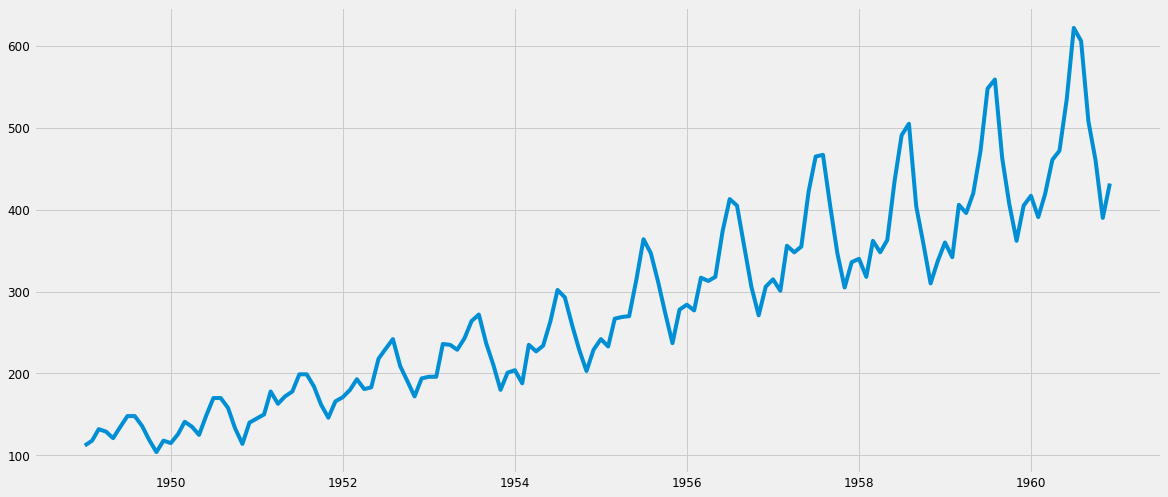

In [31]:
# Plot
plt.plot(df_serie)

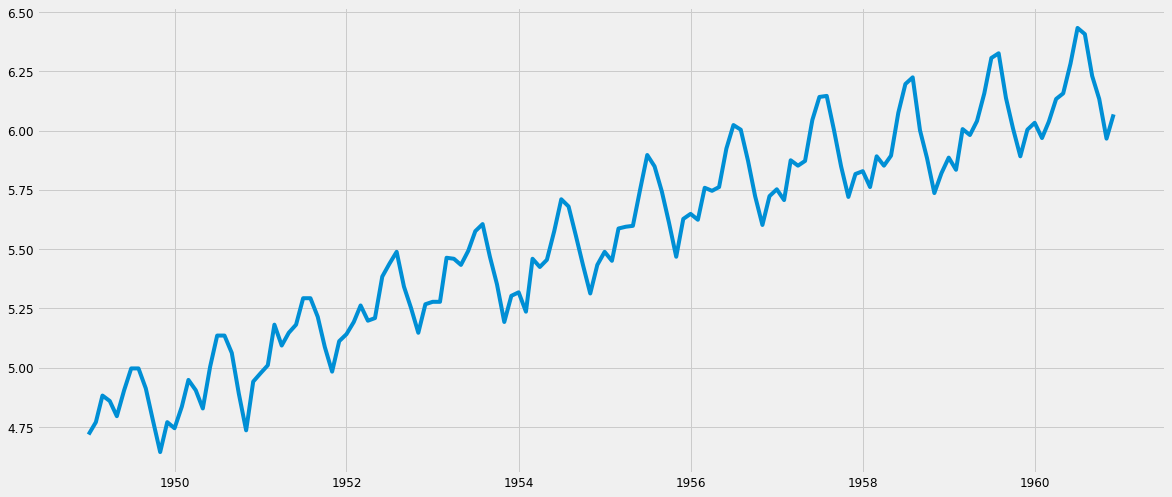

In [32]:
# Transformação Linear da Série
df_serie_log = np.log(df_serie)
plt.plot(df_serie_log)

### Decomposição

In [33]:
# Decompondo a série temporal
decomposition = seasonal_decompose(df_serie_log)

In [34]:
# Extraindo cada componente da série
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

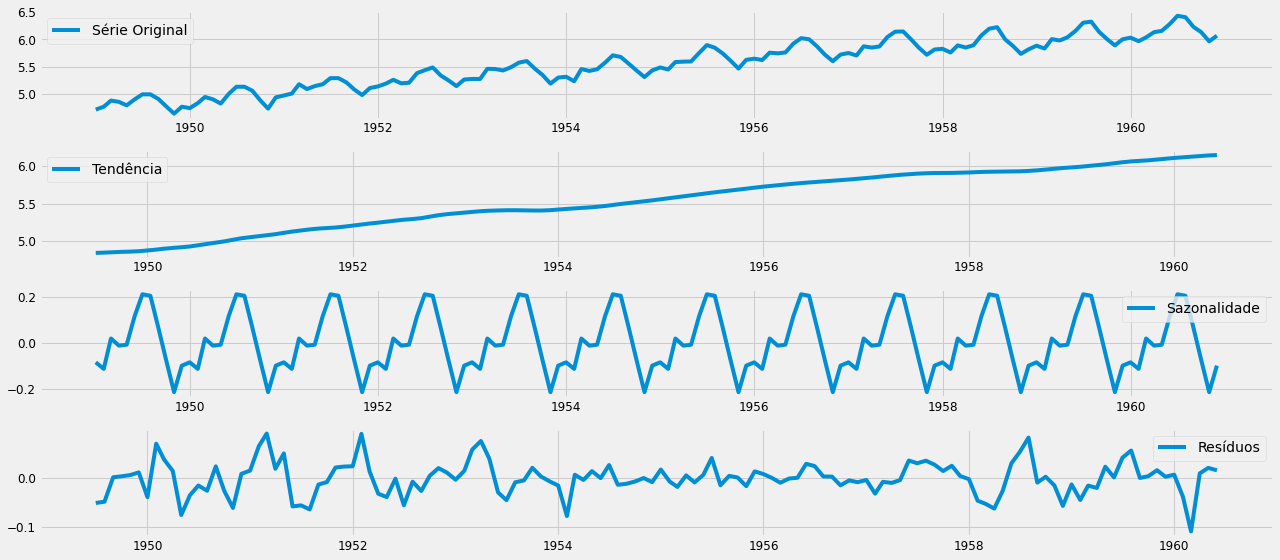

In [35]:
# Plot
plt.subplot(411)
plt.plot(df_serie_log, label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

A decomposição de séries temporais é geralmente apresentada como uma etapa de análise a ser executada antes da geração de previsões, mas também pode ser usada como um método de previsão por si só, se você souber como será a estrutura de suas séries temporais de antemão. Esses cenários ocorrem frequentemente em um contexto comercial, como previsão de demanda no varejo, onde é seguro assumir para alguns produtos que os dados de vendas terão um padrão sazonal anual e uma tendência ano a ano.

Para prever uma série temporal usando um modelo de decomposição, calculamos os valores futuros para cada componente separado e os adicionamos novamente para obter uma previsão. O desafio simplesmente se torna encontrar o melhor modelo para cada um dos componentes.

É o que estudaremos a partir da próxima aula.